In [1]:
#!pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import json
import ast
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from matplotlib.dates import DateFormatter
import numpy as np

In [3]:
plt.style.use('seaborn-poster')

In [4]:
populacje = pd.read_csv("wojewodztwa_populacja.csv")

In [5]:
def get_data_single_region(url, region):
    result = requests.get(url)
    content = result.content
    soup = BeautifulSoup(content)
    #print(soup)
    
    soup=str(soup)
    str_to_data=(soup.split("liniowy zarażenia")[1].split(";")[0].split("=")[1])
    #print(str_to_data)
    
    country="Data"
    zar="Potwierdzone"
    chor="aktywne"
    zgo="zgony"
    wyl="wyleczeni"
    null=0
    
    #eval(str_to_data)
    
    list_of_dicts=eval(str_to_data[1:])
    region_df=pd.DataFrame(list_of_dicts)
    region_df["województwo"]=region
    
    region_df.Data = pd.to_datetime(region_df.Data, dayfirst=True)

    
    return(region_df)

In [6]:
df=get_data_single_region("https://koronawirusunas.pl/wojewodztwo-lodzkie", "łódzkie")
print(df.Data)

0     2020-03-12
1     2020-03-13
2     2020-03-14
3     2020-03-16
4     2020-03-17
         ...    
123   2020-07-16
124   2020-07-17
125   2020-07-18
126   2020-07-19
127   2020-07-20
Name: Data, Length: 128, dtype: datetime64[ns]


In [7]:
regions_names = {
"dolnośląskie":"dolnoslaskie",
"kujawsko-pomorskie":"kujawsko-pomorskie",
"lubelskie":"lubelskie",
"lubuskie":"lubuskie",
"łódzkie":"lodzkie",
"małopolskie":"malopolskie",
"mazowieckie":"mazowieckie",
"opolskie":"opolskie",
"podkarpackie":"podkarpackie",
"podlaskie":"podlaskie",
"pomorskie":"pomorskie",
"śląskie" : "slaskie",
"świętokrzyskie":"swietokrzyskie",
"warmińsko-mazurskie":"warminsko-mazurskie",
"wielkopolskie":"wielkopolskie",
"zachodniopomorskie":"zachodniopomorskie",}



In [8]:
regional_dfs=[]
for region in regions_names:
    link = "https://koronawirusunas.pl/wojewodztwo-"+regions_names[region]
    single_df=get_data_single_region(link, region)
    regional_dfs.append(single_df)
    
all_regions = pd.concat(regional_dfs).reset_index(drop=True)


timestamp=time.strftime("%Y_%m_%d")
all_regions.to_csv("./regions_data/wojewodztwa_wzrost_"+timestamp+".csv")
    

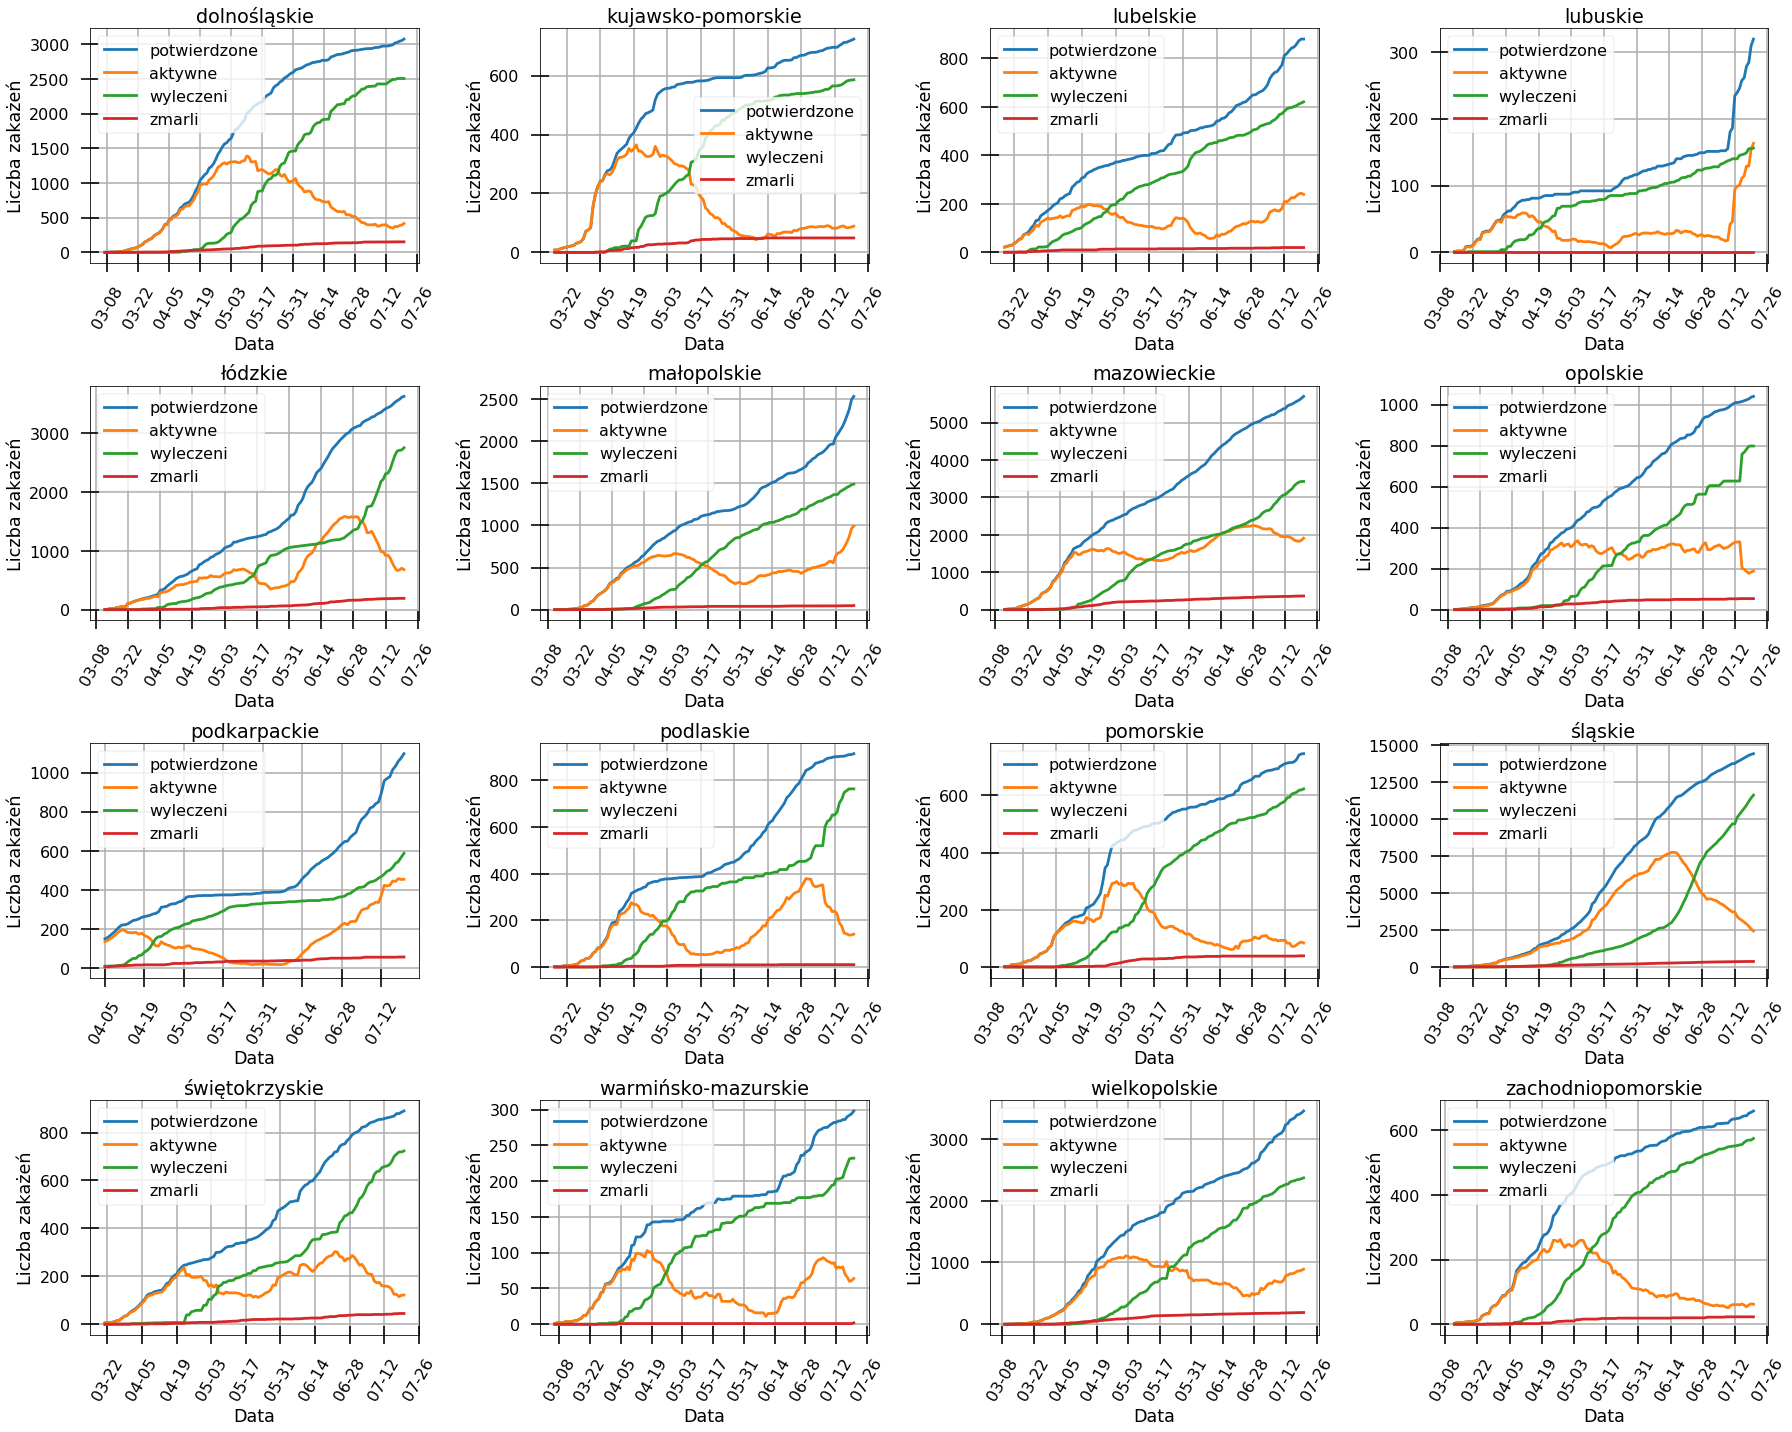

In [17]:
#all_regions['Data'] = all_regions['Data'].str.replace(r'.2020', '')


fig, axis = plt.subplots(4,4, figsize=(25, 20), sharey=False, sharex=False)
for ax, region in zip(axis.flatten(), regions_names):

    a=all_regions.loc[all_regions["województwo"]==region]

    variables = ["nowe", "zgony", "wyleczeni"]
    #a[variables] = a[variables].cumsum(axis=0)

    ax.plot(a["Data"], a["Potwierdzone"], label="potwierdzone")
    ax.plot(a["Data"], a["Potwierdzone"]-(a["zgony"]+a["wyleczeni"]), label="aktywne")
    #ax.plot(a["Data"], a["zgony"]+a["wyleczeni"], label="nieaktywne")
    ax.plot(a["Data"], a["wyleczeni"], label="wyleczeni")
    ax.plot(a["Data"], a["zgony"], label="zmarli")

    tick_spacing=14
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
#    ax.set_xticks(ax.get_xticks()[::7])

#    ticks = ax.get_xticks()
#    ticks.reverse()
#    ticks=ticks[::7]
#    ticks.reverse()
#    print(ticks)
#    ax.set_xticks(ticks)
    
    
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_tick_params(rotation=60, direction="out")
    ax.tick_params(direction='inout', length=18, colors='k')  
    
    ax.set(xlabel="Data",
    ylabel="Liczba zakażeń",
    title=region)
    
    ax.grid(True)
    ax.legend()
    
    
timestamp=time.strftime("%Y_%m_%d")
plt.tight_layout()
fig.savefig("./regions/values_w_active"+timestamp+".png")
plt.show()



In [10]:
#aktywne
regional_active_pernums=[]
regional_total_pernums=[]
pernum=10000

#for region in regions:
for region in regions_names:    

    a=all_regions.loc[all_regions["województwo"]==region]["aktywne"]
    b=all_regions.loc[all_regions["województwo"]==region]["Potwierdzone"]

    active_per_pernum=((a.values / populacje[populacje["region"] == region].population.values[0])*pernum)[-1]
    total_per_pernum=((b.values / populacje[populacje["region"] == region].population.values[0])*pernum)[-1]


    regional_active_pernums.append(active_per_pernum)
    regional_total_pernums.append(total_per_pernum)



    
#for region in regions_names:
#    per_pernum=((a.values / populacje[populacje["region"] == region].population.values[0])*pernum)[-1]
#    print(np.round(per_pernum,2))

nums_regions = sorted(zip(regional_active_pernums, regional_total_pernums, regions_names), reverse=True)
print(nums_regions)


print("")    


for act_num, tot_num, reg in nums_regions:
    print(reg)



print("")        
print("active")    
print("")    

    
for act_num, tot_num, reg in nums_regions:
    print(np.round(act_num,2))

print("")       
print("total")
print("")    

for act_num, tot_num, reg in nums_regions:
    print(np.round(tot_num,2))

[(5.3578144352182, 31.802786548775632, 'śląskie'), (3.536654247353339, 10.556292949713995, 'mazowieckie'), (2.920092678389579, 7.451676583121041, 'małopolskie'), (2.7652512526750357, 14.71827279649616, 'łódzkie'), (2.555832636179657, 9.882743664869379, 'wielkopolskie'), (2.132441528124508, 5.152617525005695, 'podkarpackie'), (1.905715728034092, 10.542257218911999, 'opolskie'), (1.606626793409479, 3.144257344157201, 'lubuskie'), (1.4338770691690579, 10.592077484510853, 'dolnośląskie'), (1.1933648912049009, 7.744176421648824, 'podlaskie'), (1.1286260654064777, 4.155610617396236, 'lubelskie'), (0.9826458302793453, 7.168481876628011, 'świętokrzyskie'), (0.44787096837401147, 2.085399196491491, 'warmińsko-mazurskie'), (0.42834281864013185, 3.4844966370275894, 'kujawsko-pomorskie'), (0.36448504729487424, 3.880002116364791, 'zachodniopomorskie'), (0.35997073952131603, 3.196882996225021, 'pomorskie')]

śląskie
mazowieckie
małopolskie
łódzkie
wielkopolskie
podkarpackie
opolskie
lubuskie
dolnoślą